<a href="https://colab.research.google.com/github/dohyeondol1/School-lesson/blob/main/lesson10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy.random import seed
sample="natural language processing"
char_set=list(set(sample))

char_set=list(set(sample))
char_dic={w: i for i, w in enumerate(char_set)}

print(char_set)
print(char_dic)

['l', 's', 'r', 'c', 'o', 'p', 'i', 'a', 'n', 'g', 't', 'e', 'u', ' ']
{'l': 0, 's': 1, 'r': 2, 'c': 3, 'o': 4, 'p': 5, 'i': 6, 'a': 7, 'n': 8, 'g': 9, 't': 10, 'e': 11, 'u': 12, ' ': 13}


In [ ]:
x_str=sample[:-3]
y_str=sample[3:]

print('train_data: ', x_str)
print('train_label: ', y_str)


train_data:  natural language process
train_label:  ural language processing


In [ ]:
x=[char_dic[c] for c in x_str]
y=[char_dic[c] for c in y_str]

data_dim = len(char_set)
timesteps = len(y_str)
num_classes = len(char_set)

print(x)
print(y)

[8, 7, 10, 12, 2, 7, 0, 13, 0, 7, 8, 9, 12, 7, 9, 11, 13, 5, 2, 4, 3, 11, 1, 1]
[12, 2, 7, 0, 13, 0, 7, 8, 9, 12, 7, 9, 11, 13, 5, 2, 4, 3, 11, 1, 1, 6, 8, 9]


In [ ]:
from tensorflow import keras
from keras.utils import to_categorical

x=to_categorical(x, num_classes = num_classes)
y=to_categorical(y, num_classes = num_classes)

x=np.reshape(x, (-1, len(x), data_dim))
y=np.reshape(y, (-1, len(y), data_dim))
print(x.shape)
print(y.shape)

(1, 24, 14)
(1, 24, 14)


In [ ]:
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, SimpleRNN, TimeDistributed

model=Sequential()
model.add(SimpleRNN(num_classes, input_shape = (timesteps, data_dim), return_sequences=True))
model.add(TimeDistributed(Dense(num_classes)))
model.add(Activation('softmax'))

model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 24, 14)            406       
                                                                 
 time_distributed_4 (TimeDis  (None, 24, 14)           210       
 tributed)                                                       
                                                                 
 activation_4 (Activation)   (None, 24, 14)            0         
                                                                 
Total params: 616
Trainable params: 616
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 2.7172 - accuracy: 0.0417
Epoch 2/300
1/1 [==============================] - 0s 13ms/step - loss: 2.6792 - accuracy: 0.0417
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 2.6523 - accuracy: 0.0417
Epoch 4/300
1/1 [==============================] - 0s 12ms/step - loss: 2.6300 - accuracy: 0.0417
Epoch 5/300
1/1 [==============================] - 0s 12ms/step - loss: 2.6104 - accuracy: 0.0417
Epoch 6/300
1/1 [==============================] - 0s 12ms/step - loss: 2.5924 - accuracy: 0.0417
Epoch 7/300
1/1 [==============================] - 0s 14ms/step - loss: 2.5757 - accuracy: 0.0417
Epoch 8/300
1/1 [==============================] - 0s 13ms/step - loss: 2.5599 - accuracy: 0.0833
Epoch 9/300
1/1 [==============================] - 0s 16ms/step - loss: 2.5448 - accuracy: 0.0833
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 2.5303 - accuracy: 0.0833
Epoch 11/300
1/1 [===

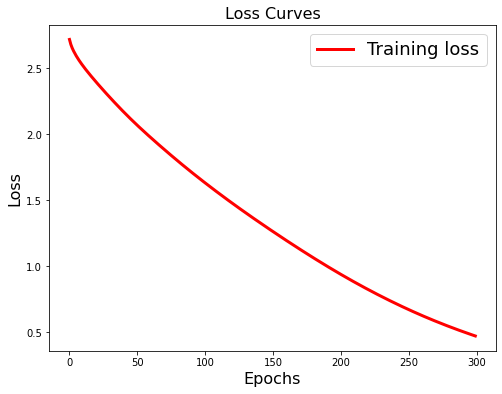

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def loss_graph(history):
  plt.figure(figsize=[8, 6])
  plt.plot(history.history['loss'], 'r', linewidth=3.0)
  plt.legend(['Training loss'], fontsize=18)
  plt.xlabel('Epochs', fontsize=16)
  plt.ylabel('Loss', fontsize=16)
  plt.title('Loss Curves', fontsize=16)

loss_graph(history)

In [ ]:
predictions=model.predict(x, verbose =0)

for i, prediction in enumerate(predictions):
  x_index=np.argmax(x[i], axis=1)
  x_str=[char_set[j] for j in x_index]
  print('입력값: ', "/".join(x_str), x_index)

  index=np.argmax(prediction, axis=1)
  result=[char_set[j] for j in index]
  print("예측값: ", "/".join(result), index)

입력값:  n/a/t/u/r/a/l/ /l/a/n/g/u/a/g/e/ /p/r/o/c/e/s/s [ 8  7 10 12  2  7  0 13  0  7  8  9 12  7  9 11 13  5  2  4  3 11  1  1]
예측값:  u/r/a/l/ /l/a/n/g/u/a/g/e/ /p/r/o/c/e/s/s/i/n/g [12  2  7  0 13  0  7  8  9 12  7  9 11 13  5  2  4  3 11  1  1  6  8  9]
